#Data Summary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns

In [2]:
ds = pd.read_csv("train_v9rqX0R.csv")
ds.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
print(list(ds.columns))

['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales']


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
ds.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
ds.Item_Identifier.value_counts(dropna = False)

FDW13    10
FDG33    10
FDO19     9
FDU12     9
NCY18     9
         ..
FDE52     1
FDQ60     1
FDN52     1
FDK57     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

It can be seen that there are 1559 different item IDs in the “Item_Identifier” column.
Besides, there are “Item_Identifier” values that start with the same specific character, such as “DR”, “FD”, and “NC”, followed by numbers at the end of a value.


#Data Exploration

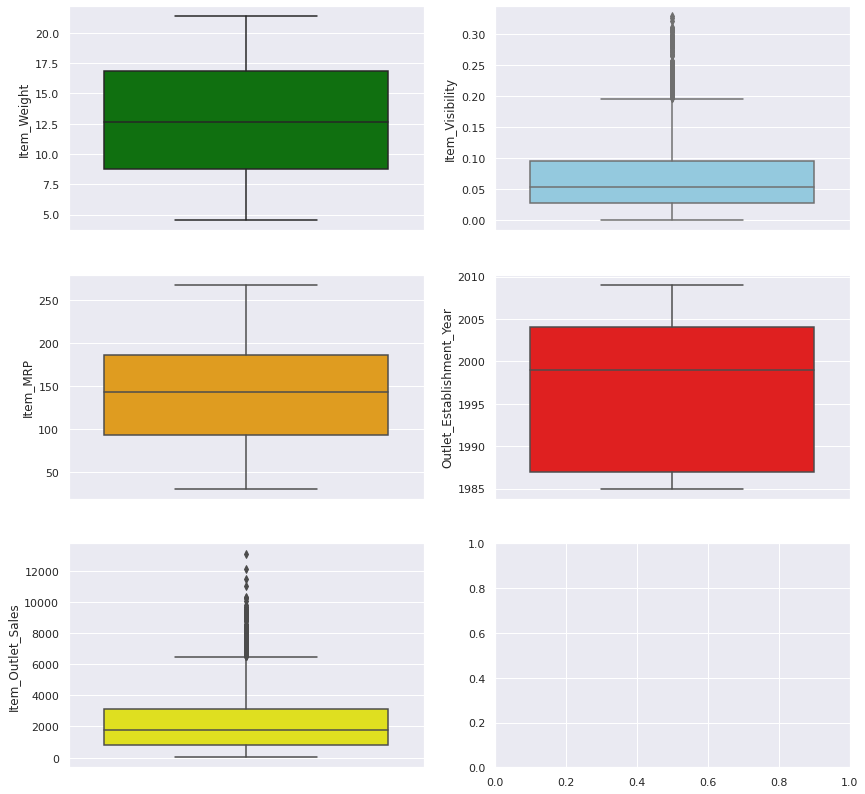

In [13]:
sns.set(style="darkgrid")
fig, axs1 = plt.subplots(3, 2, figsize=(14, 14))

sns.boxplot(data=ds, y="Item_Weight", ax=axs1[0, 0], color='green')
sns.boxplot(data=ds, y="Item_Visibility", ax=axs1[0, 1], color='skyblue')
sns.boxplot(data=ds, y="Item_MRP", ax=axs1[1, 0], color='orange')
sns.boxplot(data=ds, y="Outlet_Establishment_Year", ax=axs1[1, 1], color='red')
sns.boxplot(data=ds, y="Item_Outlet_Sales", ax=axs1[2, 0], color='yellow');

It can be seen that the distribution of "Item_Weight", "Item_MRP" and "Outlet_Establishment_Year" is normal, means no outliers detected in these columns.
In "Item_Visibility" and "Item_Outlet_Sales" column, it can be seen that the distribution is right-skewed distributions, which has a long right tail, and the mean position is on the right side of the data.

In [14]:
ds.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

It can be seen that there are missing values in the “Item_Weight” column (1463 missing values) and the “Outlet_Size” column (2410 missing values).

In [15]:
ds['Item_Fat_Content'] = ds['Item_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat')
ds['Item_Fat_Content'] = ds['Item_Fat_Content'].replace('reg', 'Regular')

In [16]:
ds.groupby(['Outlet_Type', 'Outlet_Size'], dropna=False)['Item_Identifier'].nunique().reset_index().sort_values(by=['Outlet_Size'], ascending=False)

,Outlet_Type,Outlet_Size,Item_Identifier
0,Grocery Store,Small,528
4,Supermarket Type1,Small,1311
3,Supermarket Type1,Medium,930
6,Supermarket Type2,Medium,928
7,Supermarket Type3,Medium,935
2,Supermarket Type1,High,932
1,Grocery Store,NaN,555
5,Supermarket Type1,NaN,1305


In [17]:
ds.Outlet_Size.value_counts(dropna=False)

Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

 It can be seen that the “Small” outlet size belongs to “Grocer Store” and “Supermarket Type1” outlet type.
 However, if the total “Outlet_Size” outlets are added up, the “Medium” size outlet is much bigger than the “Small” size outlets.

In [7]:
ds.groupby(['Outlet_Identifier','Outlet_Size'], dropna=False)['Item_Identifier'].nunique().reset_index().sort_values(by=['Outlet_Size'], ascending=False)

,Outlet_Identifier,Outlet_Size,Item_Identifier
4,OUT019,Small,528
6,OUT035,Small,930
8,OUT046,Small,930
3,OUT018,Medium,928
5,OUT027,Medium,935
9,OUT049,Medium,930
1,OUT013,High,932
0,OUT010,NaN,555
2,OUT017,NaN,926
7,OUT045,NaN,929


In [8]:
ds['Outlet_Size'] = ds['Outlet_Size'].replace(np.nan, 'Small')

In [9]:
ds.groupby(['Outlet_Identifier','Outlet_Size'], dropna=False)['Item_Identifier'].nunique().reset_index().sort_values(by=['Outlet_Size'], ascending=False)

,Outlet_Identifier,Outlet_Size,Item_Identifier
0,OUT010,Small,555
2,OUT017,Small,926
4,OUT019,Small,528
6,OUT035,Small,930
7,OUT045,Small,929
8,OUT046,Small,930
3,OUT018,Medium,928
5,OUT027,Medium,935
9,OUT049,Medium,930
1,OUT013,High,932


In [10]:
ds['Item_Weight']=ds.groupby('Item_Identifier')['Item_Weight'].fillna(method='ffill')
ds['Item_Weight']=ds.groupby('Item_Identifier')['Item_Weight'].fillna(method='bfill')
ds[['Item_Identifier', 'Item_Weight']].drop_duplicates().sort_values(by=['Item_Identifier'])

,Item_Identifier,Item_Weight
118,DRA12,11.600
1148,DRA24,19.350
1876,DRA59,8.270
3465,DRB01,7.390
1431,DRB13,6.115
...,...,...
1224,NCZ30,6.590
922,NCZ41,19.850
411,NCZ42,10.500
1267,NCZ53,9.600


the missing values has been replaced by following the previous data.

In [11]:
ds1 = ds[['Item_Identifier', 'Item_Weight']].drop_duplicates().sort_values(by=['Item_Identifier'])
nan_values = ds1[ds1['Item_Weight'].isna()]
print (nan_values)

     Item_Identifier  Item_Weight
4187           FDE52          NaN
1922           FDK57          NaN
927            FDN52          NaN
5022           FDQ60          NaN


There are still missing values in the “Item_Weight” column.
This is because the item ID does not have the value in the previous record.

In [13]:
ds['Item_Weight']=ds['Item_Weight'].fillna(ds['Item_Weight'].mean())

#Handling Outliers


In [14]:
ds1 = ds[['Item_Visibility', 'Item_Outlet_Sales']].copy()

ds1['Item_Visibility_log'] = np.log(ds1['Item_Visibility'])
ds1['Item_Outlet_Sales_log'] = np.log(ds1['Item_Outlet_Sales'])

ds1['Item_Visibility_sqrt'] = np.sqrt(ds1['Item_Visibility'])
ds1['Item_Outlet_Sales_sqrt'] = np.sqrt(ds1['Item_Outlet_Sales'])

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


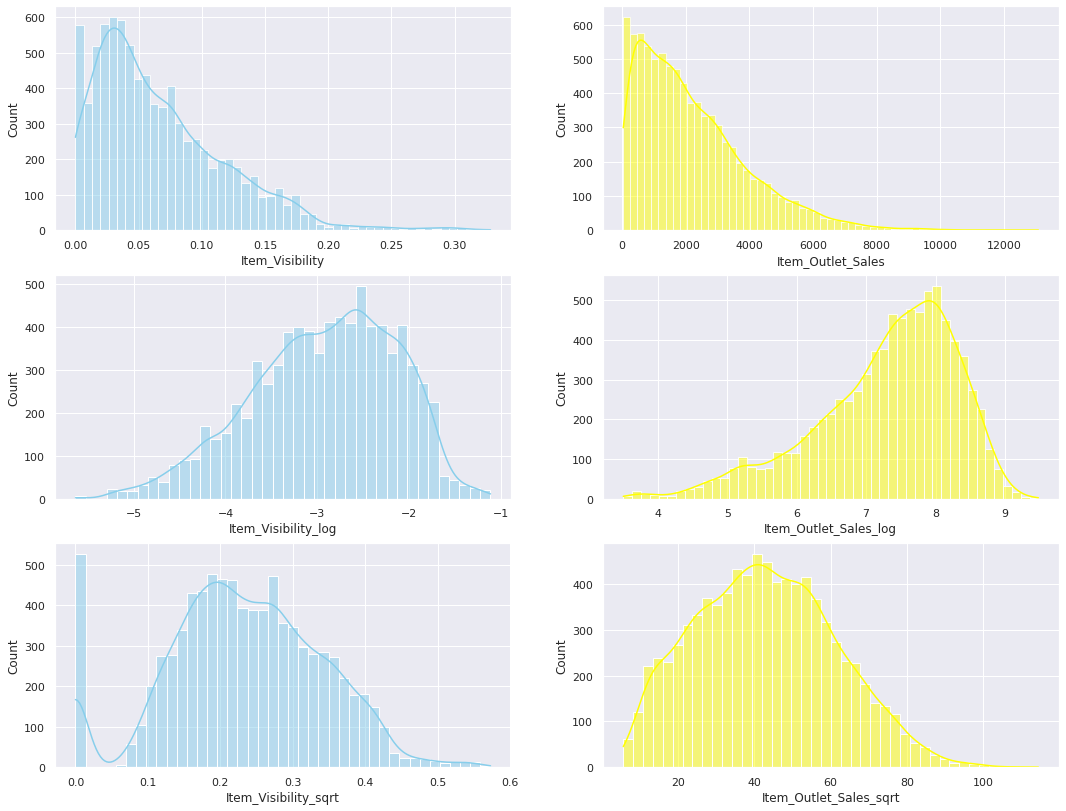

In [15]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(3, 2, figsize=(18, 14))

sns.histplot(data=ds1, x="Item_Visibility", kde=True, ax=axs[0, 0], color='skyblue')
sns.histplot(data=ds1, x="Item_Outlet_Sales", kde=True, ax=axs[0, 1], color='yellow')
sns.histplot(data=ds1, x="Item_Visibility_log", kde=True, ax=axs[1, 0], color='skyblue')
sns.histplot(data=ds1, x="Item_Outlet_Sales_log", kde=True, ax=axs[1, 1], color='yellow')
sns.histplot(data=ds1, x="Item_Visibility_sqrt", kde=True, ax=axs[2, 0], color='skyblue')
sns.histplot(data=ds1, x="Item_Outlet_Sales_sqrt", kde=True, ax=axs[2, 1], color='yellow');

It can be seen that the square root transformation is better than the log transformation for these two columns since the frequency distribution of the square root transformation is closer to the normal distribution even though there are still outliers in both columns.

In [16]:
ds['Item_Visibility_sqrt'] = np.sqrt(ds['Item_Visibility'])
ds['Item_Outlet_Sales_sqrt'] = np.sqrt(ds['Item_Outlet_Sales'])

ds = ds.drop(columns=['Item_Visibility', 'Item_Outlet_Sales'])

In [17]:
ds.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Visibility_sqrt         0
Item_Outlet_Sales_sqrt       0
dtype: int64